<a href="https://colab.research.google.com/github/ArtemBaron/baron_vergeles/blob/main/scipytests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as st
import math

1. Student t test
Average between two data samples are significantly different.


Assumption:


    *    Each data sample's observation are independent and distributed.
    *    Observations are normally distributed.
    *    Observations have same variance between each other.

Hypothesis:


    *    H0: the mean between two samples are equal.
    *    H1: the mean between two samples are not equal.



In [3]:
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = st.ttest_ind(data1, data2)
print(f'stat = {stat:.2f}, p = {p:.2f}')
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat = -0.33, p = 0.75
Probably the same distribution


2. Paired Student t test
Average between two data samples are significantly different.


Assumption:


    *    Each data sample's observation are independent and distributed.
    *    Observations are normally distributed.
    *    Observations have same variance between each other.
    *    Observations are paired.


Hypothesis:


    *    H0: the mean between two samples are equal.
    *    H1: the mean between two samples are not equal.

In [4]:
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = st.ttest_rel(data1, data2)
print(f'stat = {stat:.2f}, p = {p:.2f}')
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat = -0.33, p = 0.75
Probably the same distribution


3. One Sample Student t test
Average between sample and population are significantly different.


Assumption:


    *    Each data sample's observation are independent and distributed.
    *    Observations are normally distributed.
    *    Observations have same variance between each other.

Hypothesis:


    *    H0: the mean between two samples are equal.
    *    H1: the mean between two samples are not equal.


In [5]:
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = st.ttest_1samp(data1, popmean=0)
print(f'stat = {stat:.2f}, p = {p:.2f}')
if p > 0.05:
    print('Probably the same mean')
else:
    print('Probably different mean')

stat = -0.71, p = 0.50
Probably the same mean


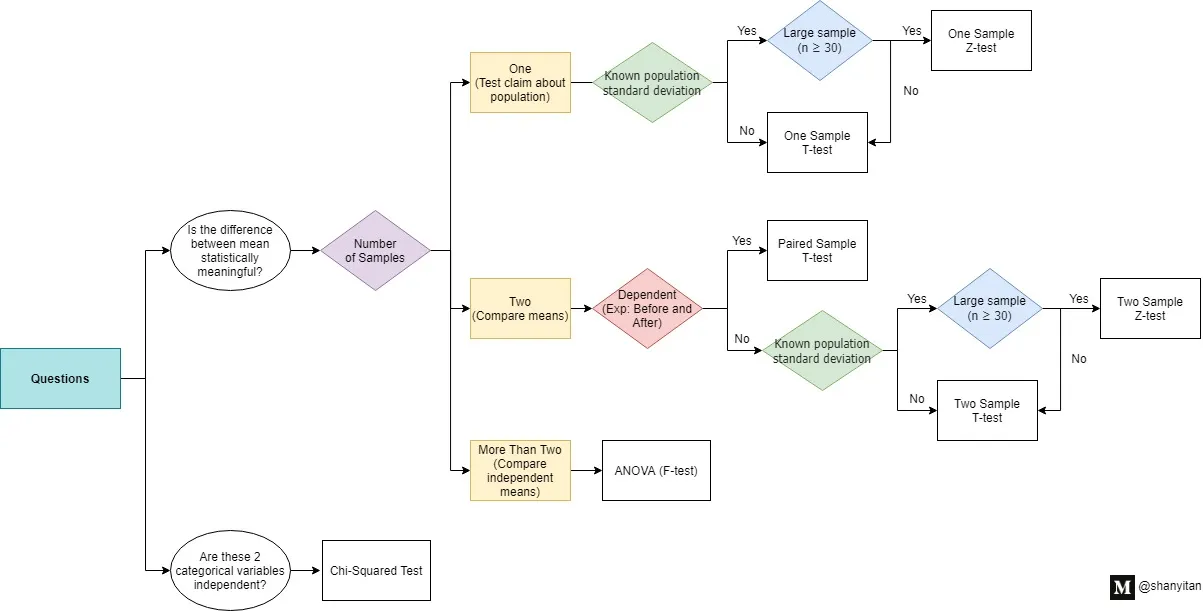

4. F-test
Dependency between two samples.
Work with categorical variables
Two category variables have non-random connections or we can say it’s used to check whether two category variables have a significant relationship

Hypothesis:


    *    H0: no associations between the rows and columns, or the classifications are independent
    *    H1: there are associations between the rows and columns, or the classifications are dependent.

In [6]:
# importing packages
import scipy.stats as stats

# creating data
data = [[2, 8], [7, 3]]

# performing fishers exact test on the data
odd_ratio, p_value = stats.fisher_exact(data)
print('odd ratio is : ' + str(odd_ratio))
print('p_value is : ' + str(p_value))

odd ratio is : 0.10714285714285714
p_value is : 0.06977851869492736


5. Chi-2
Independence between categorical variables.
Work with categorical variables
Two category variables have non-random connections or we can say it’s used to check whether two category variables have a significant relationship

Hypothesis:


    *    H0: no associations between the rows and columns, or the classifications are independent
    *    H1: there are associations between the rows and columns, or the classifications are dependent.

In [7]:
# defining the table
data = [[207, 282, 241], [234, 242, 232]]
stat, p, dof, expected = st.chi2_contingency(data)

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.1031971404730939
Independent (H0 holds true)


6. Chi2 - on difference in means between observed and expected values

In [8]:
national = pd.DataFrame(["white"]*100000 + ["hispanic"]*60000 +\
                        ["black"]*50000 + ["asian"]*15000 + ["other"]*35000)


minnesota = pd.DataFrame(["white"]*600 + ["hispanic"]*300 + \
                         ["black"]*250 +["asian"]*75 + ["other"]*150)

national_table = pd.crosstab(index=national[0], columns="count")
minnesota_table = pd.crosstab(index=minnesota[0], columns="count")

print( "National")
print(national_table)
print(" ")
print( "Minnesota")
print(minnesota_table)

National
col_0      count
0               
asian      15000
black      50000
hispanic   60000
other      35000
white     100000
 
Minnesota
col_0     count
0              
asian        75
black       250
hispanic    300
other       150
white       600


In [9]:
observed = minnesota_table

national_ratios = national_table/len(national)  # Get population ratios

expected = national_ratios * len(minnesota)   # Get expected counts

chi_squared_stat = (((observed-expected)**2)/expected).sum()

print(chi_squared_stat)

crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 4)   # Df = number of variable categories - 1

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=4)
print("P value")
print(p_value)


col_0
count    18.194805
dtype: float64
Critical value
9.487729036781154
P value
[0.00113047]


In [18]:
#sample mean differs from the an expected (population) mean
stat, p = st.chisquare(f_obs= observed, f_exp= expected)
print(f'stat = {stat}, p = {p}')
if p > 0.05:
    print('Probably the same mean')
else:
    print('Probably different mean')  # Array of expected counts

stat = [18.19480519], p = [0.00113047]
Probably different mean


7. Chi2 independence

In [19]:
np.random.seed(10)

# Sample data randomly at fixed probabilities
voter_race = np.random.choice(a= ["asian","black","hispanic","other","white"],
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

# Sample data randomly at fixed probabilities
voter_party = np.random.choice(a= ["democrat","independent","republican"],
                              p = [0.4, 0.2, 0.4],
                              size=1000)

voters = pd.DataFrame({"race":voter_race,
                       "party":voter_party})

voter_tab = pd.crosstab(voters.race, voters.party, margins = True)

voter_tab.columns = ["democrat","independent","republican","row_totals"]

voter_tab.index = ["asian","black","hispanic","other","white","col_totals"]

observed = voter_tab.iloc[0:5,0:3]   # Get table without totals for later use
voter_tab

,democrat,independent,republican,row_totals
asian,21,7,32,60
black,65,25,64,154
hispanic,107,50,94,251
other,15,8,15,38
white,189,96,212,497
col_totals,397,186,417,1000


In [20]:
expected =  np.outer(voter_tab["row_totals"][0:5],
                     voter_tab.loc["col_totals"][0:3]) / 1000

expected = pd.DataFrame(expected)

expected.columns = ["democrat","independent","republican"]
expected.index = ["asian","black","hispanic","other","white"]

expected

,democrat,independent,republican
asian,23.820,11.160,25.020
black,61.138,28.644,64.218
hispanic,99.647,46.686,104.667
other,15.086,7.068,15.846
white,197.309,92.442,207.249


In [21]:
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()

print(chi_squared_stat)

7.169321280162059


In [22]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 8)   # *

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=8)
print("P value")
print(p_value)

Critical value
15.50731305586545
P value
0.518479392948842


In [27]:
#features are independent
stat, p, obs, exp = stats.chi2_contingency(observed= observed)
print(f'stat = {stat}, p = {p}')
if p > 0.05:
    print('Probably independent')
else:
    print('Probably not independent')  # Array of expected counts

stat = 7.169321280162059, p = 0.518479392948842
Probably independent
